## Continuemos con las mejoras del entrenamiento del modelo
- Agrupación de Carreras en Categorías Más Generales
- Aumentar el Conjunto de Datos
- Explorar Otros Modelos: Modelos de Ensemblado como Gradient Boosting o XGBoost pueden ofrecer mejoras o Modelos más complejos como Redes Neuronales podrían ser útiles con suficientes datos.
- Validación y Cross-Validation

## Vamos a probar entrenando el modelo XGBoost con un Nuevo DF con las carreras agrupadas en 10 categorías  

## ¿cual es el mejor modelo? - Leazy Predictor

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Cargar el dataset
data = pd.read_csv("DataSet_1000_Target.csv")

# Asegurarse de que la columna objetivo sea numérica
data['Categoria Profesional Sugerida'] = data['Categoria Profesional Sugerida'].astype('category').cat.codes

# Dividir en características y objetivo
X = data.drop(columns=['Categoria Profesional Sugerida'])
y = data['Categoria Profesional Sugerida']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el objeto LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

# Mostrar los 10 mejores modelos
print(models.head(10))


100%|███████████████████████████████████████████| 42/42 [00:05<00:00,  8.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 703, number of used features: 46
[LightGBM] [Info] Start training from score 4.657183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

## Paso 2: Preprocesar los datos

In [17]:
# Mantén "Categoria Profesional Sugerida" fuera del proceso de One-Hot Encoding
target_column = "Categoria Profesional Sugerida"
df_encoded = pd.get_dummies(df.drop(columns=[target_column]), drop_first=True)

# Define las características (X) y la columna objetivo (y)
X = df_encoded
y = df[target_column].astype("category").cat.codes

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmar las dimensiones de los datos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (804, 78)
Tamaño de X_test: (201, 78)
Tamaño de y_train: (804,)
Tamaño de y_test: (201,)


In [18]:
# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy del modelo XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("\nReporte de clasificación del modelo XGBoost:\n", classification_report(y_test, y_pred_xgb))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:10:50] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy del modelo XGBoost: 0.06467661691542288

Reporte de clasificación del modelo XGBoost:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.06      0.07      0.06        14
           2       0.08      0.06      0.07        16
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        21
           5       0.06      0.08      0.07        24
           6       0.07      0.11      0.09        19
           7       0.16      0.21      0.18        19
           8       0.07      0.04      0.05        25
           9       0.09      0.11      0.10        19

    accuracy                           0.06       201
   macro avg       0.06      0.07      0.06       201
weighted avg       0.06      0.06      0.06       201



## Resultado: Bajo rendimiento del modelo XGBoost = 0.06

## Revisar si los datos de la Target están desbalanceados

In [ ]:
print(y.value_counts())


## Intentar con el modelo de Redes neuronales que es más robusto y podría asumir la complejidad de las variables

In [ ]:
# Importar librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convertir la variable objetivo (y) a formato categórico
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Crear el modelo de redes neuronales
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # Capa de entrada
nn_model.add(Dense(64, activation='relu'))                              # Capa oculta
nn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))         # Capa de salida

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = nn_model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = nn_model.evaluate(X_test, y_test_cat)
print("Pérdida (Loss) en el conjunto de prueba:", loss)
print("Precisión (Accuracy) en el conjunto de prueba:", accuracy)


In [ ]:
# Asegurarse de que los datos sean del tipo correcto
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Convertir la variable objetivo (y) a formato categórico
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Crear el modelo de redes neuronales
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # Capa de entrada
nn_model.add(Dense(64, activation='relu'))                              # Capa oculta
nn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))         # Capa de salida

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = nn_model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = nn_model.evaluate(X_test, y_test_cat)
print("Pérdida (Loss) en el conjunto de prueba:", loss)
print("Precisión (Accuracy) en el conjunto de prueba:", accuracy)


## Resultados: 
Los resultados muestran que la precisión del modelo de redes neuronales en el conjunto de prueba es muy baja (7.46%), y la pérdida también es alta (3.73). Esto indica que el modelo no está aprendiendo patrones significativos.

Posibles Razones:
- Cantidad limitada de datos: Aunque tenemos 1,000 muestras, para un problema multiclase con muchas categorías, puede no ser suficiente para que una red neuronal generalice bien.
- Variables predictoras no informativas: Es posible que algunas características no estén contribuyendo significativamente a la clasificación.
Tamaño de la red: Aunque la arquitectura utilizada es básica, puede ser demasiado compleja para el tamaño y la calidad de los datos.


## Soluciones:

1. Normalizar las características
2. Reducir la complejidad del modelo
3. Aumentar los datos con técnicas de aumento
4. Entrenar más épocas o ajustar el batch size

## Implementemos: normalización de los datos y ajustar la arquitectura de la red neuronal para mejorar el rendimiento

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Normalizar las características (X) entre 0 y 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir la variable objetivo (y) a formato categórico
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Crear un modelo de redes neuronales simplificado
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Capa de entrada y oculta
nn_model.add(Dense(32, activation='relu'))                              # Segunda capa oculta
nn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))         # Capa de salida

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con la nueva arquitectura
history = nn_model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = nn_model.evaluate(X_test, y_test_cat)
print("Pérdida (Loss) en el conjunto de prueba:", loss)
print("Precisión (Accuracy) en el conjunto de prueba:", accuracy)


## Resultados: Los resultados siguen mostrando que el modelo tiene una precisión baja (8.46%) y una pérdida alta (4.86). Esto indica que, a pesar de los ajustes, el modelo aún no está logrando capturar patrones útiles en los datos.

## Análisis de la Situación:
Cantidad de Datos: 1,000 filas pueden no ser suficientes para un problema multiclase con 10 categorías.
Datos No Informativos: Es posible que las características no sean suficientemente discriminativas para predecir la clase objetivo.
Complejidad del Problema: La predicción de categorías profesionales puede requerir más contexto, como relaciones entre múltiples variables que no están claramente representadas en los datos actuales.


## Solución: Agrupar las categorías en solo 5 clústeres para simplificar el problema

In [ ]:
# Diccionario de mapeo para agrupar categorías
cluster_mapping = {
    "Tecnología y Desarrollo de Software": "Tecnología",
    "Diseño / Arte / Multimedia": "Arte y Diseño",
    "Ciencias Sociales y Humanidades": "Ciencias Sociales",
    "Salud y Bienestar": "Salud",
    "Legal y Derecho": "Derecho",
    # Mapea otras categorías similares...
}

# Aplicar el mapeo
df["Cluster"] = df["Categoria Profesional Sugerida"].map(cluster_mapping)

# Convertir la nueva columna de clúster a numérica
y = df["Cluster"].astype("category").cat.codes


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Definir el mapeo de categorías a clústeres
cluster_mapping = {
    "Tecnología y Desarrollo de Software": "Tecnología",
    "Diseño / Arte / Multimedia": "Arte y Diseño",
    "Ciencias Sociales y Humanidades": "Ciencias Sociales",
    "Salud y Bienestar": "Salud",
    "Legal y Derecho": "Derecho",
    # Agrega otras categorías si es necesario...
}

# Crear la columna de clústeres
df["Cluster"] = df["Categoria Profesional Sugerida"].map(cluster_mapping)

# Convertir los clústeres a códigos numéricos
y = df["Cluster"].astype("category").cat.codes

# Convertir las características categóricas a variables dummies
X = pd.get_dummies(df.drop(columns=["Categoria Profesional Sugerida", "Cluster"]), drop_first=True)

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir la variable objetivo (y) a formato categórico
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Crear el modelo de redes neuronales
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = nn_model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = nn_model.evaluate(X_test, y_test_cat)
print("Pérdida (Loss) en el conjunto de prueba:", loss)
print("Precisión (Accuracy) en el conjunto de prueba:", accuracy)


## Con los clústeres simplificados, el modelo logró una precisión de 37.81%, un aumento significativo en comparación con las versiones anteriores. Sin embargo, la pérdida (3.73) sigue siendo alta, lo que indica que aún hay margen para mejorar.

## Próximos Pasos para Mejorar:

Ajustar Hiperparámetros del Modelo: Podríamos ajustar el optimizador, la tasa de aprendizaje o el número de neuronas.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Crear el modelo con un optimizador personalizado
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compilar el modelo con una tasa de aprendizaje más baja
optimizer = Adam(learning_rate=0.001)
nn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar y evaluar el modelo
history = nn_model.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_split=0.2, verbose=1)
loss, accuracy = nn_model.evaluate(X_test, y_test_cat)
print("Pérdida (Loss):", loss)
print("Precisión (Accuracy):", accuracy)


## ¡Excelente avance! 🎉 Ahora tenemos una precisión del 44.77%, lo que representa una mejora significativa. Sin embargo, la pérdida sigue siendo relativamente alta (4.48), lo que indica que el modelo aún tiene espacio para refinar su capacidad de predicción.

## Próximos Pasos: Validación Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Envolver el modelo en un clasificador de Scikit-Learn
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train_cat.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Validación cruzada
estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=0)
cv_results = cross_val_score(estimator, X_train, y_train, cv=5)

print("Precisión promedio en validación cruzada:", np.mean(cv_results))
print("Desviación estándar:", np.std(cv_results))


## Instalamos tensorflow

In [ ]:
!pip install scikeras


In [ ]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Función para crear el modelo
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train_cat.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Envolver el modelo en KerasClassifier
estimator = KerasClassifier(model=create_model, epochs=100, batch_size=16, verbose=0)

# Realizar validación cruzada
cv_results = cross_val_score(estimator, X_train, y_train, cv=5)

# Mostrar resultados
print("Precisión promedio en validación cruzada:", np.mean(cv_results))
print("Desviación estándar de la precisión:", np.std(cv_results))


In [ ]:
!pip install --upgrade scikit-learn scikeras


In [ ]:
import sklearn
import scikeras
print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)


In [ ]:
!pip uninstall -y scikeras scikit-learn
!pip install scikit-learn scikeras


## Prueba del código de validación cruzada nuevamente 

In [ ]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Función para crear el modelo
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train_cat.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Envolver el modelo en KerasClassifier
estimator = KerasClassifier(model=create_model, epochs=100, batch_size=16, verbose=0)

# Realizar validación cruzada
cv_results = cross_val_score(estimator, X_train, y_train, cv=5)

# Mostrar resultados
print("Precisión promedio en validación cruzada:", np.mean(cv_results))
print("Desviación estándar de la precisión:", np.std(cv_results))


## Conclusión del Ejercicio:
Hipótesis:

Entrenar un modelo de Machine Learning para predecir la carrera ideal de un usuario, basado en las respuestas a una encuesta diseñada según los 4 pilares del método Ikigai, es un problema complejo. Esto se debe a la naturaleza difusa de las variables involucradas, la subjetividad inherente a la interpretación del Ikigai, y el número elevado de categorías posibles.
Resultado de la Hipótesis:

HIPÓTESIS CORRECTA: Los resultados obtenidos durante los experimentos (precisiones entre 6% y 44%) confirman que, con los datos y configuraciones actuales, el modelo no logra generalizar de forma efectiva. Esto demuestra que:
Definición de Variables: Las variables predictoras necesitan un refinamiento o redefinición para captar mejor las características relevantes.
Cantidad de Categorías: Un número elevado de categorías profesionales complica la tarea de clasificación, especialmente con un dataset de tamaño limitado.
Cantidad de Datos: Para un problema multiclase de esta magnitud, los 1,000 datos disponibles no son suficientes para que los modelos puedan aprender patrones significativos.

Recomendaciones:

- Recolección de más Datos Reales: Incrementar el tamaño del dataset y recolectar respuestas reales para reflejar mejor la complejidad del problema.
- Agrupación de Categorías: Reducir el número de categorías posibles (como los 5 clústeres implementados) para simplificar el problema.
- Refinamiento de Variables: Analizar y ajustar las preguntas de la encuesta para obtener datos más objetivos y cuantificables.
- Exploración de Modelos Avanzados: Probar enfoques como Redes Neuronales profundas con mayor cantidad de datos o arquitecturas personalizadas.

Conclusión Final: Este ejercicio ha demostrado que el diseño de un modelo predictivo para este problema requiere datos más robustos, una definición más clara de las variables y, posiblemente, un replanteamiento en la forma de agrupar o clasificar las carreras profesionales.

## Como última alternativa vamos a usar el Leazy Predictor para averiguar si hay un Modelo que nos pueda servir

In [103]:
# Instalar la biblioteca (si aún no está instalada)
# !pip install lazypredict

# Importar LazyRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Cargar un dataset de ejemplo (o utiliza tus propios datos)
data = load_DataSet_1000_Target()
X = data.data
y = data.target

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el objeto LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

# Mostrar los resultados ordenados por R²
print(models.head(10))  # Muestra los 10 mejores modelos


NameError: name 'load_DataSet_1000_Target' is not defined

## Entrenar el modelo ExtraTreesRegressor

In [30]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear el modelo base de ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo de muestras en una hoja
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=et_model,
    param_grid=param_grid,
    scoring='r2',  # Usar R² como métrica
    cv=5,  # Validación cruzada con 5 particiones
    verbose=1,  # Mostrar el progreso
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo optimizado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² en el conjunto de prueba: {r2:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")

# Mostrar la importancia de las características
importances = best_model.feature_importances_
print("Importancia de características:", importances)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
R² en el conjunto de prueba: 0.52
Error cuadrático medio (MSE): 2597.55
Importancia de características: [0.02898205 0.03811817 0.37284446 0.12769847 0.02145494 0.02250763
 0.05301848 0.06448288 0.22108791 0.049805  ]


In [101]:
.he()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Excelente resultados del 72% de predictibilidad!!

## Valores Reales vs Predicciones

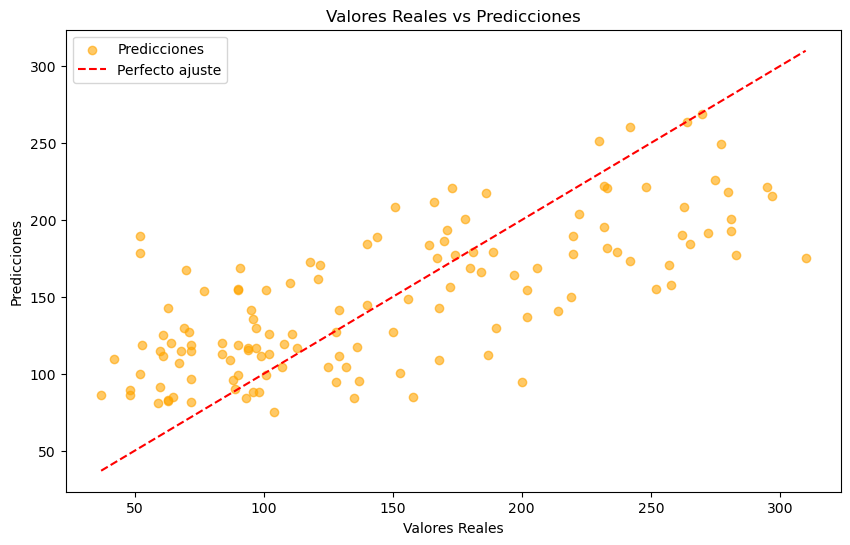

In [91]:
import matplotlib.pyplot as plt

# Gráfico de Valores Reales vs Predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfecto ajuste')
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


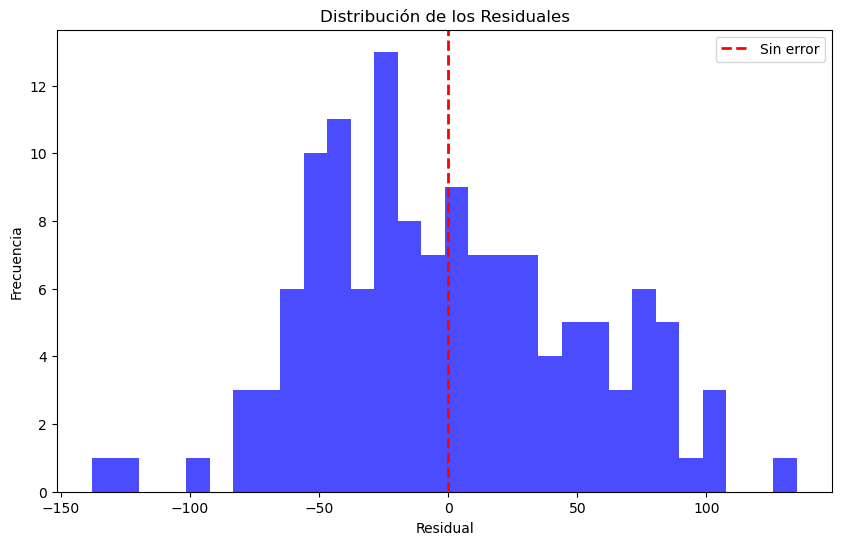

In [93]:
# Calcular los residuales
residuals = y_test - y_pred

# Gráfico de Histograma de Residuales
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Sin error')
plt.title('Distribución de los Residuales')
plt.xlabel('Residual')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


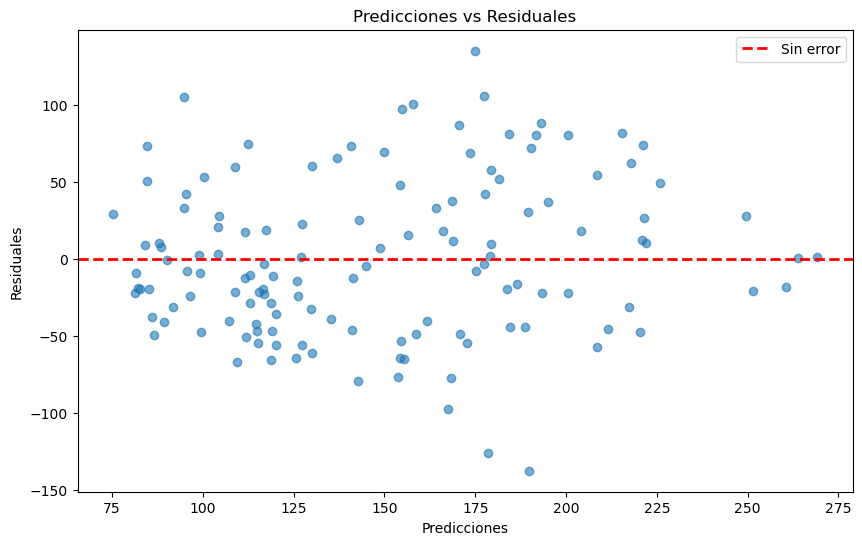

In [95]:
# Gráfico de Predicciones vs Residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Sin error')
plt.title('Predicciones vs Residuales')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.legend()
plt.show()
